### 因子分析


In [ ]:
!pip install factor_analyzer
import os
os.chdir('/content/drive/MyDrive/dataset/marketing_statistics-model')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42564 sha256=f3ee689569409d008c82daa6fc5e6343af8285baa9f0e9f10eff50d82fd76dd3
  Stored in directory: /root/.cache/pip/wheels/24/59/82/6493618e30ed1cb7a013b9e1b0c9e17de80b04dfcef4ba8a4d
Successfully built factor_analyzer


In [ ]:
df = pd.read_csv('sec7_data.csv')
df.head()

,PNL,q1,q2,q3,q4,q5,q6,q7,q8,q9,...,q16,q17,q18,q19,q20,q21,q22,q23,q24,q25
0,502,4,4,3,2,2,3,2,2,2,...,4,4,2,2,2,1,1,5,3,4
1,12002,3,3,3,3,3,2,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,13302,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
3,19541,3,4,3,2,1,3,2,2,2,...,3,3,2,3,3,5,4,2,1,3
4,19848,3,4,3,1,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3


In [ ]:
print(df.shape)

(1235, 26)


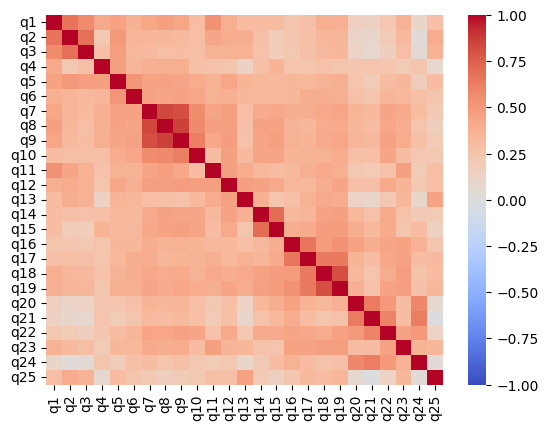

In [ ]:
fig, ax = plt.subplots()
sns.heatmap(df.drop('PNL', axis=1).corr(), vmax=1.0, vmin=-1.0, cmap='coolwarm')
plt.show()

因子数の決め方
- スクリープロットで固有値が1以上
- 累積寄与率が50%~60%くらいの因子数
- 実務経験

In [ ]:
X = df.drop('PNL', axis=1)
ss = StandardScaler()
fa = FactorAnalyzer(n_factors=6, rotation='promax', method='ml') # 最尤法とプロマックス回転
X_ss = ss.fit_transform(X)
X_fa = fa.fit_transform(X_ss) # 因子得点を計算

5


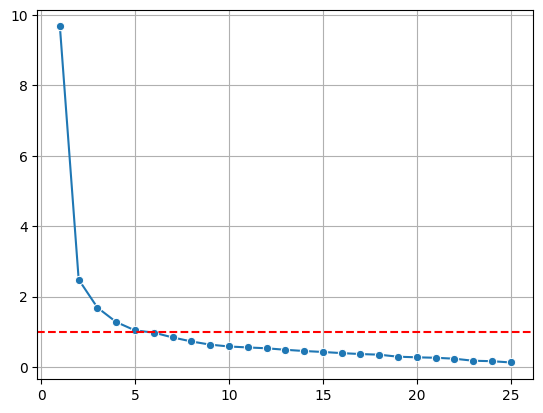

In [ ]:
eigen = fa.get_eigenvalues()
x = list(range(1, len(eigen[0])+1))
print(np.sum(eigen[0]>1))
fig, ax = plt.subplots()
sns.lineplot(x=x, y=eigen[0], marker='o')
plt.axhline(y=1, color='r', linestyle='--');plt.grid();

In [ ]:
display(pd.DataFrame(fa.get_factor_variance(), index=["因子寄与", "因子寄与率", "累積寄与率"]))

,0,1,2,3,4,5
因子寄与,4.226252,3.185356,2.748823,2.640083,1.542296,1.470815
因子寄与率,0.169050,0.127414,0.109953,0.105603,0.061692,0.058833
累積寄与率,0.169050,0.296464,0.406417,0.512021,0.573712,0.632545


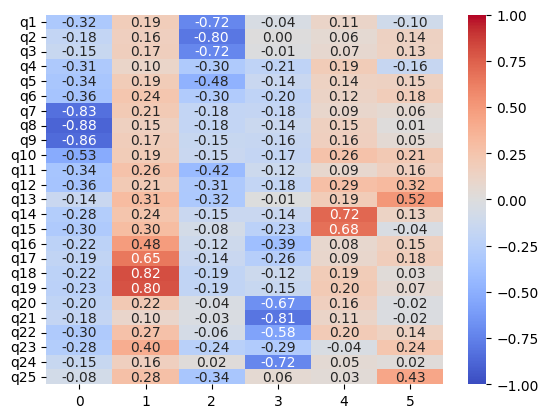

In [ ]:
# 因子負荷量(カラム数、因子の数)
factor_loadings = fa.components_.T
fig, ax = plt.subplots()
sns.heatmap(factor_loadings, vmin=-1, vmax=1, cmap='coolwarm', annot=True, fmt='.2f', yticklabels=X.columns)
plt.show()

In [ ]:
# 因子得点
df_fs = pd.DataFrame(X_fa, )
df_fs.head()

,0,1,2,3,4,5
0,-1.182313,-1.155842,-0.128243,-0.744239,0.612156,-2.294887
1,0.046513,0.277400,-0.603451,-0.156724,-0.635941,-0.230958
2,0.109866,0.361277,-0.541156,-0.122689,-0.653071,0.265414
3,-0.959646,0.602063,-0.586534,-0.904382,-0.354684,0.467938
4,0.178796,0.344809,-0.221475,-0.085629,0.298343,0.216297
